# fig_10_8_wavelet_PSD

"""
Wavelet transform of a Noisy Spike
-----------------------------------

Figure 10.8

Localized frequency analysis using the wavelet transform. The upper panel shows
the input signal, which consists of a Gaussian spike in the presence of white
(Gaussian) noise (see figure 10.10). The middle panel shows an example wavelet.
The lower panel shows the power spectral density as a function of the frequency
f0 and the time t0, for Q = 0.3.


"""


In [1]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.fourier import FT_continuous, IFT_continuous


In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [3]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 7.5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [5]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

In [6]:
def wavelet(t, t0, f0, Q):
    return (np.exp(-(f0 / Q * (t - t0)) ** 2)
            * np.exp(2j * np.pi * f0 * (t - t0)))


def wavelet_FT(f, t0, f0, Q):
    # this is its fourier transform using
    # H(f) = integral[ h(t) exp(-2pi i f t) dt]
    return (np.sqrt(np.pi) * Q / f0
            * np.exp(-2j * np.pi * f * t0)
            * np.exp(-(np.pi * (f - f0) * Q / f0) ** 2))


def check_funcs(t0=1, f0=2, Q=3):
    t = np.linspace(-5, 5, 10000)
    h = wavelet(t, t0, f0, Q)

    f, H = FT_continuous(t, h)
    assert np.allclose(H, wavelet_FT(f, t0, f0, Q))


# Create the simulated dataset

In [7]:
#------------------------------------------------------------
# Create the simulated dataset
np.random.seed(5)

t = np.linspace(-40, 40, 2001)[:-1]
h = np.exp(-0.5 * ((t - 20.) / 1.0) ** 2)
hN = h + np.random.normal(0, 0.5, size=h.shape)

Text(0, 0.5, 'hN')

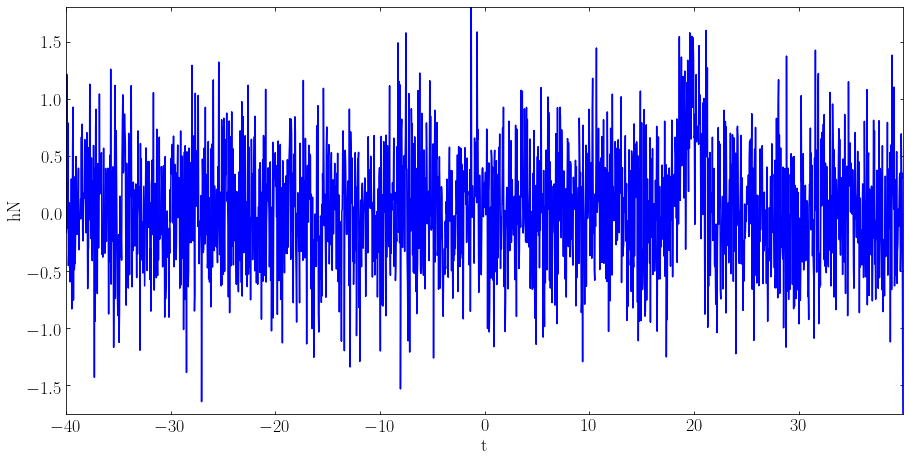

In [11]:
plt.plot(t,hN,"b-")
plt.xlabel("t")
plt.ylabel("hN")

# Compute the convolution via the continuous Fourier transform

In [8]:
#------------------------------------------------------------
# Compute the convolution via the continuous Fourier transform
# This is more exact than using the discrete transform, because
# we have an analytic expression for the FT of the wavelet.
Q = 0.3
f0 = 2 ** np.linspace(-3, -1, 100)

f, H = FT_continuous(t, hN)
W = np.conj(wavelet_FT(f, 0, f0[:, None], Q))
t, HW = IFT_continuous(f, H * W)

# Plot the results

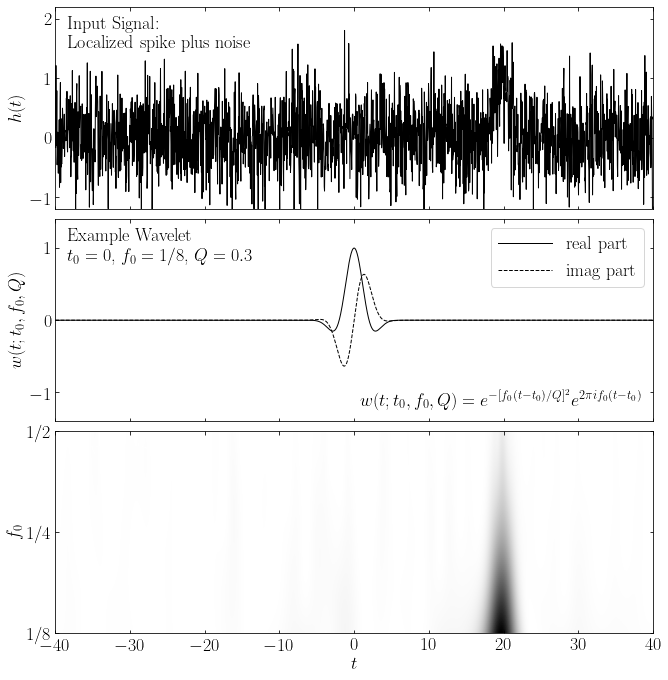

In [9]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.05, left=0.12, right=0.95, bottom=0.08, top=0.95)

# First panel: the signal
#------------------------
ax = fig.add_subplot(311)
ax.plot(t, hN, '-k', lw=1)

ax.text(0.02, 0.95, ("Input Signal:\n"
                     "Localized spike plus noise"),
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlim(-40, 40)
ax.set_ylim(-1.2, 2.2)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylabel('$h(t)$')

# Second panel: the wavelet
#--------------------------
ax = fig.add_subplot(312)
W = wavelet(t, 0, 0.125, Q)
ax.plot(t, W.real, '-k', label='real part', lw=1)
ax.plot(t, W.imag, '--k', label='imag part', lw=1)

ax.legend(loc=1)
ax.text(0.02, 0.95, ("Example Wavelet\n"
                     "$t_0 = 0$, $f_0=1/8$, $Q=0.3$"),
        ha='left', va='top', transform=ax.transAxes)
ax.text(0.98, 0.05,
        (r"$w(t; t_0, f_0, Q) = e^{-[f_0 (t - t_0) / Q]^2}"
         "e^{2 \pi i f_0 (t - t_0)}$"),
        ha='right', va='bottom', transform=ax.transAxes)

ax.set_xlim(-40, 40)
ax.set_ylim(-1.4, 1.4)
ax.set_ylabel('$w(t; t_0, f_0, Q)$')
ax.xaxis.set_major_formatter(plt.NullFormatter())

# Third panel: the spectrogram
#------------------------------
ax = fig.add_subplot(313)
ax.imshow(abs(HW) ** 2, origin='lower', aspect='auto', cmap=plt.cm.binary,
          extent=[t[0], t[-1], np.log2(f0)[0], np.log2(f0)[-1]])
ax.set_xlim(-40, 40)

ax.text(0.02, 0.95, ("Wavelet PSD"), color='w',
        ha='left', va='top', transform=ax.transAxes)

ax.set_ylim(np.log2(f0)[0], np.log2(f0)[-1])
ax.set_xlabel('$t$')
ax.set_ylabel('$f_0$')

ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, *args: ("1/%i"
                                                                 % (2 ** -x))))
plt.show()
